# Illustration's techniques classification

Because the kind of metadata we add to the images depends on whether it is a photography, a reproduction, a sketch, or a document ornament, we first build a classifier for that task.

We include in the definition of photography even pictures of statues or furnitures or any kind of object. 

A reproduction is an illustration of a painting.

Sketches include any kind of quick or unfinished drawings, sometimes of plans. 

Document ornaments are artwork done specifically for the journal or book, such as decorated letters.

## Preparing train, validation and test data

To train the model to our unique task, we will use a custom dataset. To create it, we select randomly 600 illustrations, and split it to 800 for training, 200 for validation, 200 for testing. We manually label the images as one of the four categories, then proceed to some data augmentation.

In [ ]:
!pip install fastai

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import glob
import random
import os
import shutil
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DIR_PATH = '/content/drive/MyDrive/illustration_enrichment/illustrations/'
warnings.filterwarnings('ignore')

In [ ]:
def copy_files(dataset, set_name):
    for file_name in dataset:
        # construct full file path destination
        destination = DIR_PATH + set_name + file_name.split('/')[-1:][0]
        # copy files
        if os.path.isfile(file_name):
            shutil.copy(file_name, destination)

In [ ]:
# Uncomment to make the splits
#random.seed(0)
#all_illus = glob.glob(DIR_PATH + 'DFKV/*.jpg')
#random.shuffle(all_illus)
#train = all_illus[:600]
#val = all_illus[600:800]
#test = all_illus[800:1000]
#copy_files(train, 'train/')
#copy_files(val, 'val/')
#copy_files(test, 'test/')

After creating the split, we manually sort the illustrations into the 4 categories, in each of the sets. This part is quite challenging yet important, because it can be hard to put a clear limit on what is a painting/what is a sketch, or to make a difference between a very realistic painting and a photography.

In [ ]:
data = ImageDataBunch.from_folder(DIR_PATH, train='train', valid='val', test='test', ds_tfms=get_transforms(do_flip=True, flip_vert=True), size=224, bs=64, num_workers=8)

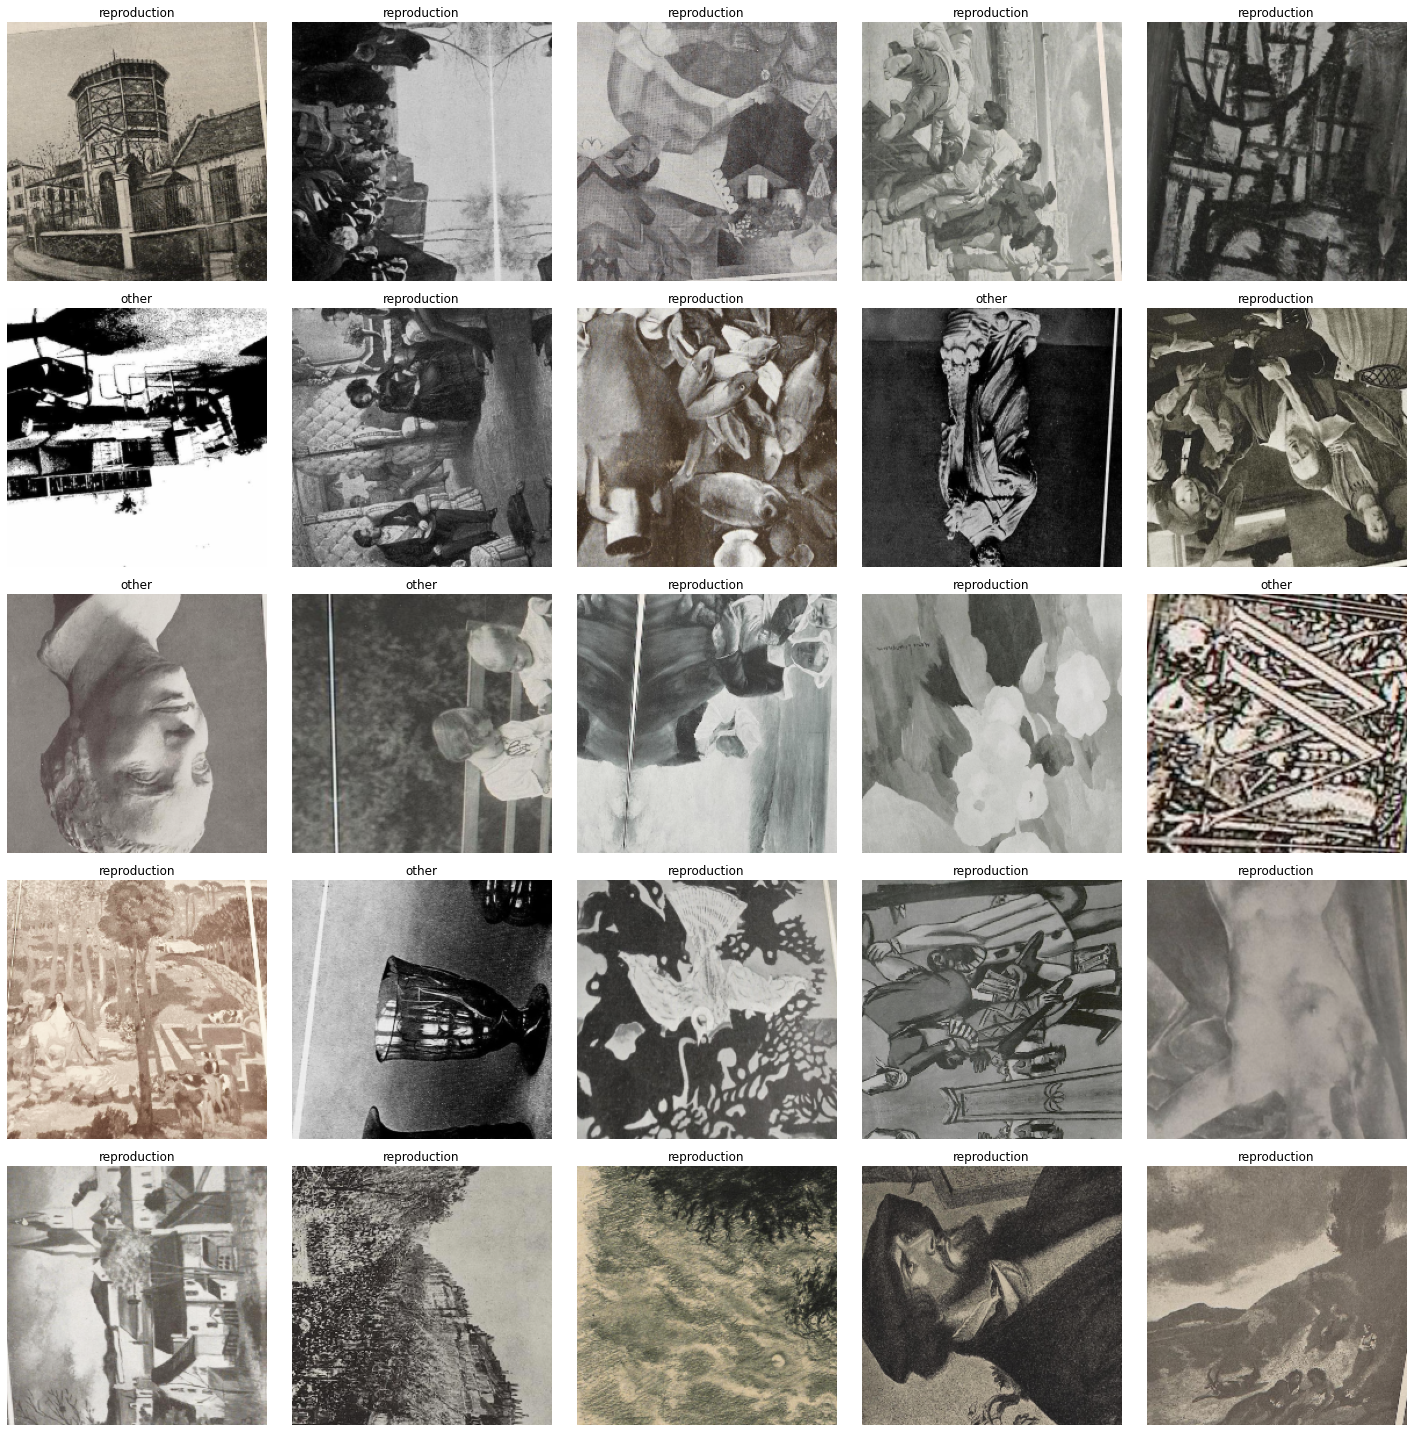

In [ ]:
data.show_batch()

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy, error_rate])

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
#learn.unfreeze()
#learn.lr_find()
#learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(13, max_lr=slice(1e-6, 1e-4))

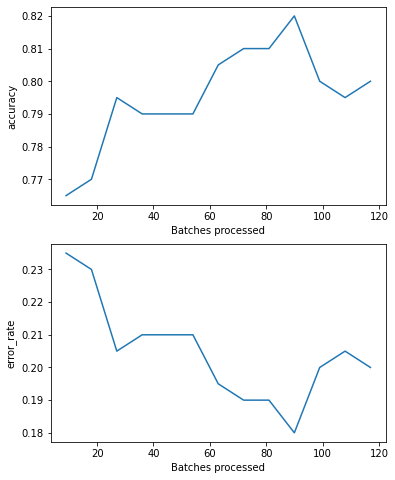

In [ ]:
learn.recorder.plot_metrics()

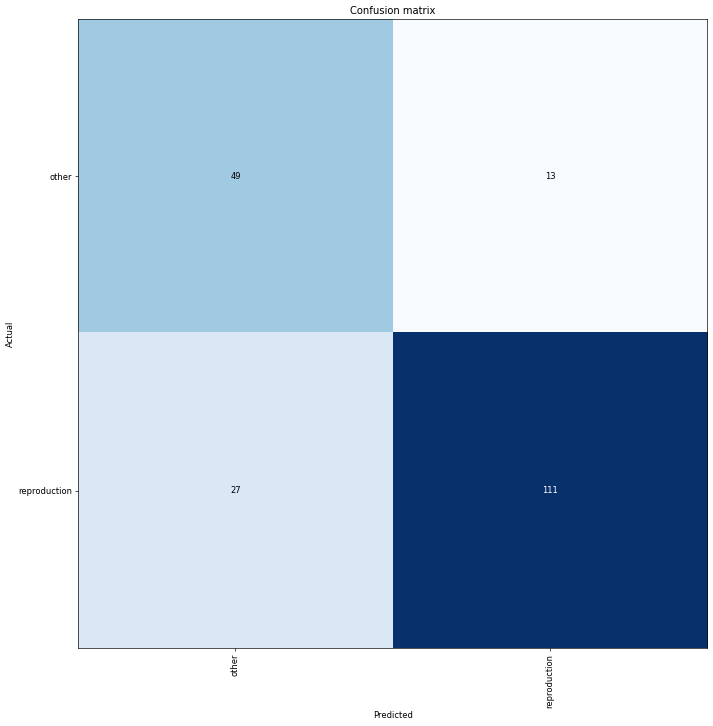

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused()

[('reproduction', 'other', 27), ('other', 'reproduction', 13)]

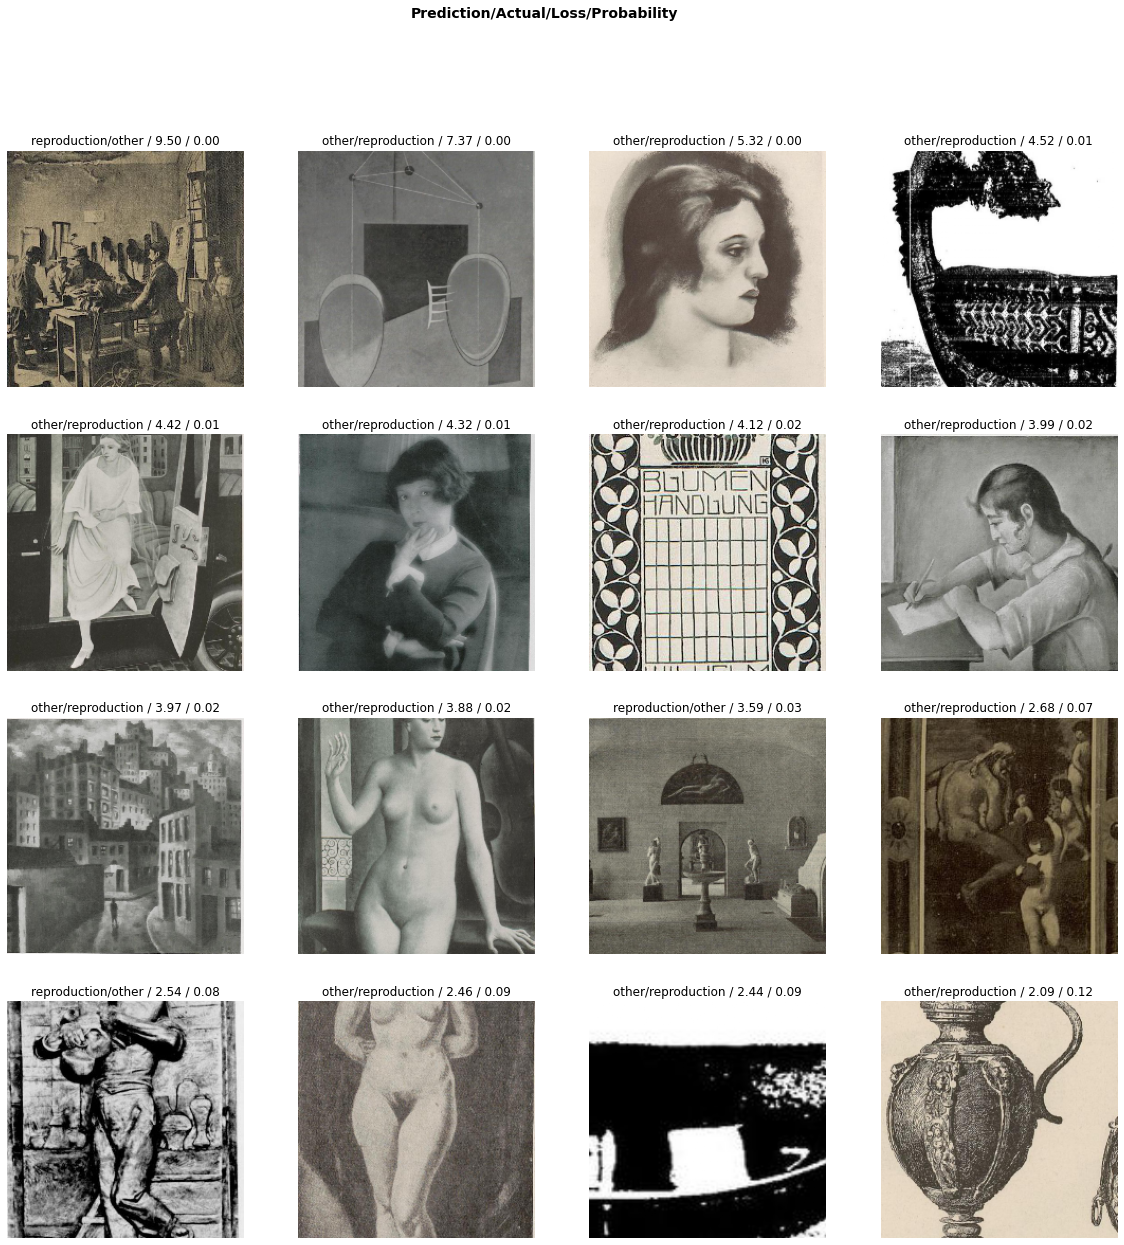

In [ ]:
interp.plot_top_losses(k=16, figsize=(20,20))